In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('/kaggle/input/makemore-dataset-new/names.txt','r').read().splitlines()

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [5]:
batch_size = 3
def build_dataset(words):
    X,Y = [],[]
    for w in words:
        #print(w)
        context = [0]*batch_size
        
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context),'--->',ch)
            context = context[1:]+[ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

In [6]:
import random
random.seed(42)
random.shuffle(words)

n1 = int(len(words)*0.8)
n2 = int(len(words)*0.9)

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

In [7]:
print(Xtr.shape,Ytr.shape)
print(Xdev.shape,Ydev.shape)
print(Xte.shape,Yte.shape)

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [8]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g) 
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [9]:
sum(p.nelement() for p in parameters)

11897

In [10]:
for p in parameters:
    p.requires_grad = True

In [11]:
lr = torch.linspace(-3,0,1000)
lre = 10**lr

In [12]:
stepi = []
lri = []
lossi = []
batch_size = 32
for i in range(200000):
    #minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(batch_size,))
    
    #forwards pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.9748015403747559


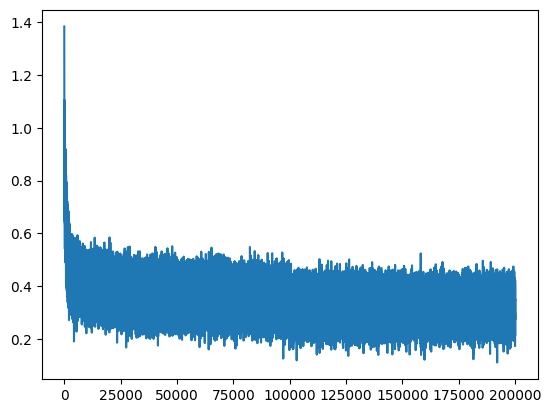

In [13]:
plt.plot(stepi,lossi)

In [14]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss.item()

2.1243271827697754

In [15]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss.item()

2.1650748252868652

In [16]:
emb = C[Xte]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte)
loss.item()

2.1626062393188477

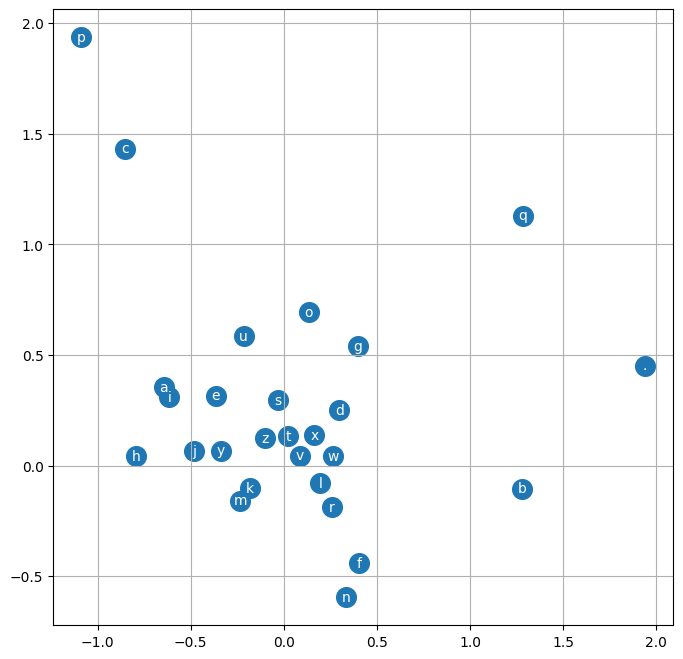

In [17]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [18]:
g = torch.Generator().manual_seed(2147483647 + 10)

batch_size = 3
for _ in range(20):
    out = []
    context = [0]* batch_size
    
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs,num_samples=1,generator=g).item()
        context = context[1:]+[ix]
        out.append(ix)
        
        if ix==0:
            break
    print(''.join(itos[i] for i in out))

mora.
mayah.
see.
mad.
ryal.
tevarstendraig.
adee.
daeliianni.
jen.
eden.
sananar.
kayzion.
kamin.
shubergiaganest.
jaireelle.
xet.
adanu.
mayven.
jamari.
eli.
